### Import des data 

In [2]:
import pandas as pd
import re
import glob
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import numpy as np
import plotly.plotly as py

In [3]:
files_secu = glob.glob(
    '/home/joseph/Dropbox/DeepLearning/Programmation/Python/KitDataScience/DataSecu/2013_departement/*110*.xls')
files_secu

['/home/joseph/Dropbox/DeepLearning/Programmation/Python/KitDataScience/DataSecu/2013_departement/depa110_13.xls']

In [4]:
#Import to dataframe
df = pd.read_excel(files_secu[0])
df


,SPECIALITE,DEPARTEMENT,NON CONVENTIONNES,CONVENTIONNES,CONVENTIONNES AVEC DEPASSEMENT,HONORAIRES LIBRES,TOTAL,POPULATION,DENSITE /100000 Hab.
0,01- Médecine générale,01- Ain,2,371,0,17,390,6.212461e+05,62.777055
1,01- Médecine générale,02- Aisne,2,357,0,7,366,5.448426e+05,67.175364
2,01- Médecine générale,03- Allier,1,252,0,4,257,3.439814e+05,74.713340
3,01- Médecine générale,04- Alpes-Hte-Provence,1,152,0,4,157,1.636114e+05,95.959056
4,01- Médecine générale,05- Hautes-Alpes,0,141,0,14,155,1.420146e+05,109.143730
5,01- Médecine générale,06- Alpes-Maritimes,14,984,0,196,1194,1.083433e+06,110.205257
6,01- Médecine générale,07- Ardèche,4,234,0,6,244,3.222801e+05,75.710540
7,01- Médecine générale,08- Ardennes,0,239,0,0,239,2.830571e+05,84.435275
8,01- Médecine générale,09- Ariège,0,146,0,0,146,1.541014e+05,94.742793
9,01- Médecine générale,10- Aube,0,209,0,5,214,3.067759e+05,69.757771


In [5]:
#cleaning 
total_specialite_slicer = df['SPECIALITE'].str.upper().str.contains("TOTAL")
total_departement_slicer = df['DEPARTEMENT'].str.upper().str.contains("TOTAL")
df2 = df[~total_specialite_slicer & ~total_departement_slicer]

df2['SPECIALITE'].str.upper().str.contains("TOTAL").sum()

0

In [6]:
df2['DEPARTEMENT_NUM'] = df2['DEPARTEMENT'].str.split('-').str.get(0)
df2['DEPARTEMENT_NAME'] = df2['DEPARTEMENT'].str.extract('[\dAB]+-(.*)')
df2['SPECIALITE_NAME'] = df2['SPECIALITE'].str.split('-', 1).str.get(1)
df2.columns

/home/joseph/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/home/joseph/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning:

currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)

/home/joseph/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/home/joseph/anaconda3/lib/python3.6/s

Index(['SPECIALITE', 'DEPARTEMENT', 'NON CONVENTIONNES', 'CONVENTIONNES',
       'CONVENTIONNES AVEC DEPASSEMENT', 'HONORAIRES LIBRES', 'TOTAL',
       'POPULATION', 'DENSITE /100000 Hab.', 'DEPARTEMENT_NUM',
       'DEPARTEMENT_NAME', 'SPECIALITE_NAME'],
      dtype='object')

In [7]:
#Lien entre densité des medecins et dépassements d'honoraires

df2['PCT_NB_DEPASSEMENT']=(df2['TOTAL']-df2['CONVENTIONNES'])/df2['TOTAL']






/home/joseph/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [74]:
#Prenons les spécialités phares et regardons si la concurence joue en faveur du patient

#Dermatologie et vénérologie, Médecine nucléaire, Neurologie, Ophtalmologie,  Rhumatologie

#Dermatologue
dfNeuro = df2.SPECIALITE.str.upper().str.contains("NEUROLOGIE")
dfDermato = df2.SPECIALITE.str.upper().str.contains("DERMATO")
dfNucl = df2.SPECIALITE.str.upper().str.contains("NUCL")
dfOphta = df2.SPECIALITE.str.upper().str.contains("OPHTA")
dfRhuma = df2.SPECIALITE.str.upper().str.contains("RHUMA")

dfDens = df2.groupby(['DEPARTEMENT_NUM'])['POPULATION'].mean()
Total= dfDens.sum()
dfDens = dfDens/Total



In [75]:
Neurodf=df2[dfNeuro]
DataNeuro = Neurodf.groupby(['DEPARTEMENT_NUM'])['PCT_NB_DEPASSEMENT'].sum().sort_values(ascending=False)

Dermatodf=df2[dfDermato]
DataDermato = Dermatodf.groupby(['DEPARTEMENT_NUM'])['PCT_NB_DEPASSEMENT'].sum().sort_values(ascending=False)

Nucldf=df2[dfNucl]
DataNucl = Nucldf.groupby(['DEPARTEMENT_NUM'])['PCT_NB_DEPASSEMENT'].sum().sort_values(ascending=False)

Ophtadf=df2[dfOphta]
DataOphta = Ophtadf.groupby(['DEPARTEMENT_NUM'])['PCT_NB_DEPASSEMENT'].sum().sort_values(ascending=False)

Rhumadf=df2[dfRhuma]
DataRhuma = Rhumadf.groupby(['DEPARTEMENT_NUM'])['PCT_NB_DEPASSEMENT'].sum().sort_values(ascending=False)



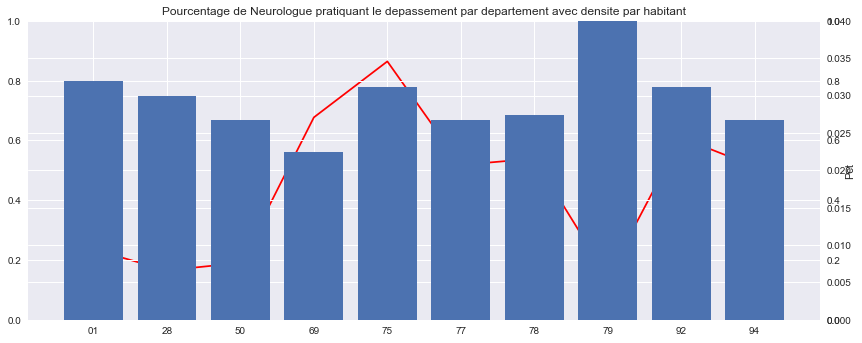

In [81]:
plt.style.use('seaborn')


fig, host = plt.subplots()
fig.subplots_adjust(right=1.5)

dens =host.twinx()
data =host.twinx()

dens.plot(DataNeuro.index[:10].sort_values(), dfDens[DataNeuro.index[:10].sort_values()], label='density', color='red')
data.bar(DataNeuro.index[:10], DataNeuro.values[:10], )
data.set_ylim(0, 1)
dens.set_ylim(0, 0.04)
plt.title("Pourcentage de Neurologue pratiquant le depassement par departement avec densite par habitant")
plt.xlabel("Departement")
plt.ylabel("Pct")
plt.legend()
plt.show()






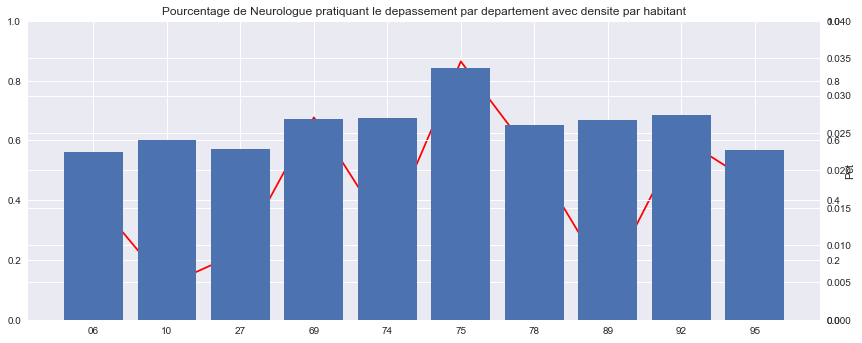

In [83]:
plt.style.use('seaborn')


fig, host = plt.subplots()
fig.subplots_adjust(right=1.5)

dens =host.twinx()
data =host.twinx()

dens.plot(DataDermato.index[:10].sort_values(), dfDens[DataDermato.index[:10].sort_values()], label='density', color='red')
data.bar(DataDermato.index[:10], DataDermato.values[:10])
data.set_ylim(0, 1)
dens.set_ylim(0, 0.04)
plt.title("Pourcentage de Dermatologue pratiquant le depassement par departement avec densite par habitant")
plt.xlabel("Departement")
plt.ylabel("Pct")
plt.legend()
plt.show()

In [84]:
#Conclusion la spécialité fait la rareté. La concurence ne joue pas pour le patient...